In [4]:
import csv
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def clean_data(picks):
    cleansed_picks = []
    for pick in picks:
        items = []
        items.append(pick[0].strip()) # absolute pick number
        items.append(pick[1].strip()) # round
        items.append(pick[2].strip()) # pick in round
        player_data = pick[-5:]
        items.append(player_data[1].strip() + " " + player_data[0].strip()) # first + last name
        items.append(player_data[2].strip()) # position
        items.append(player_data[3].strip()) # team
        items.append(player_data[4].strip()) # bye
        cleansed_picks.append(items)
    return cleansed_picks

# Read in all draft csvs
files = []
for file in os.listdir("drafts"):
    if file.endswith(".csv"):
        files.append(os.path.join("drafts", file))

print("Found " + str(len(files)) + " drafts to analyze")

# Create list of all drafts, 1 draft per file
drafts = []
for file in files:
    picks = []
    with open(file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if (row[0] == "Overall Pick"):
                continue
            picks.append(row)
    cleansed_picks = clean_data(picks)
    drafts.append(cleansed_picks)

print("Finished parsing all drafts")

Found 64 drafts to analyze
Finished parsing all drafts


In [13]:
# Find adps for every player
player_adp = {}

for draft in drafts:
    for pick in draft:
        if (pick[4] != 'K'):
            player = pick[3]
            
            # Keep a list of spots player has been picked in the dictionary
            if player in player_adp:
                player_pick_nums = player_adp[player]
                player_pick_nums.append(pick[0])
            else:
                player_pick_nums = [pick[0]]
                player_adp[player] = player_pick_nums

In [100]:
df = pd.DataFrame()
df['Player'] = []
df['Pick'] = []

# Key/Value is adp : player
players_sorted_adp = {}

count = 50
skip = 0
for player in player_adp.keys():
    count = count - 1
    skip = skip + 1
    if skip < 0:
        continue
    if count < 0:
        break
    player_picks = player_adp[player]
    player_picks = [int(x) for x in player_picks]
    avg_adp = sum(player_picks)/len(player_picks)
    if avg_adp in players_sorted_adp:
        avg_adp = avg_adp + 0.0001
    players_sorted_adp[avg_adp] = player
        

# Sort all adps, so keys are in order from lowest to highest adps
all_adps_sorted = sorted(players_sorted_adp.keys())

rank = 1

# Add player and all of their picked spots to a pandas dataframe
# Also print the ranked adp
for adp in all_adps_sorted:
    player = players_sorted_adp[adp]
    player_picks = player_adp[player]
    print(str(rank) + ". " + player + " " + str(adp))
    rank = rank + 1
    player_picks = [int(x) for x in player_picks]
    for pick in player_picks:
        df = df.append({'Player' : player, 'Pick' : pick}, ignore_index = True)

1. Christian McCaffrey 1.03125
2. Saquon Barkley 2.125
3. Ezekiel Elliott 3.203125
4. Alvin Kamara 4.234375
5. Michael Thomas 5.90625
6. Dalvin Cook 6.21875
7. Clyde Edwards-Helaire 7.8125
8. Travis Kelce 8.65625
9. Derrick Henry 8.859375
10. Miles Sanders 8.859475
11. Joe Mixon 12.40625
12. Davante Adams 12.5
13. George Kittle 13.96875
14. Kenyan Drake 14.015625
15. Josh Jacobs 15.40625
16. Tyreek Hill 16.65625
17. Austin Ekeler 17.484375
18. Julio Jones 17.96875
19. Nick Chubb 18.25
20. Aaron Jones 19.046875
21. DeAndre Hopkins 19.125
22. Chris Godwin 22.328125
23. Patrick Mahomes 25.609375
24. Lamar Jackson 25.71875
25. James Conner 27.296875
26. Mark Andrews 29.046875
27. Kenny Golladay 29.125
28. Todd Gurley 29.5
29. Allen Robinson 29.890625
30. Mike Evans 30.03125
31. D.J. Moore 32.75
32. Zach Ertz 33.078125
33. Leonard Fournette 33.515625
34. Melvin Gordon 33.875
35. JuJu Smith-Schuster 34.796875
36. Amari Cooper 35.703125
37. Le'Veon Bell 36.03125
38. Odell Beckham 36.46875
39.

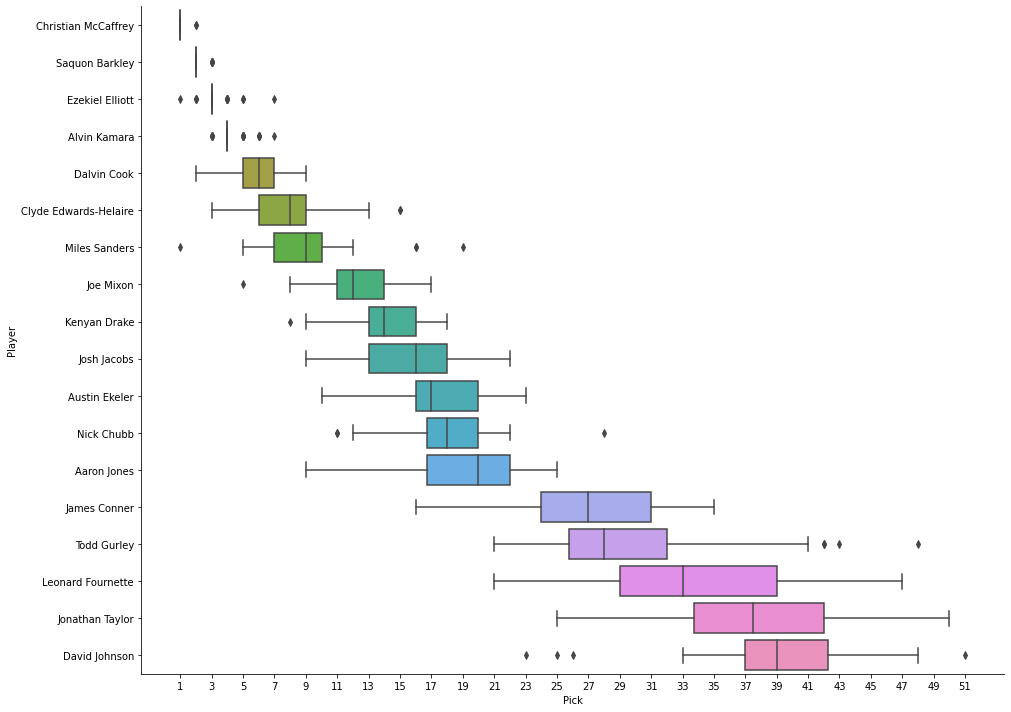

In [7]:
boxplot = sns.catplot(x="Pick", y="Player", kind="box", data=df, orient='h', height=10, aspect=11.7/8.27);
boxplot.set(xticks=[i for i in range(int(min(df['Pick'])), int(max(df['Pick'])) + 1, 2)])

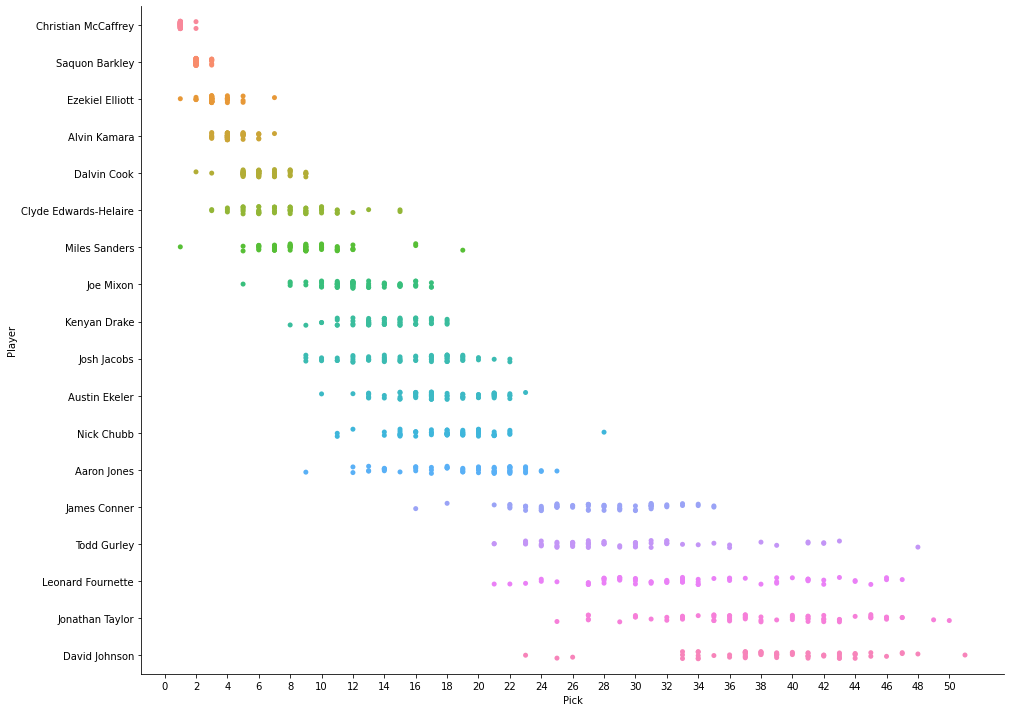

In [8]:
scatterplot = sns.catplot(x="Pick", y="Player", data=df, height=10, aspect=11.7/8.27);
scatterplot.set(xticks=[i for i in range(0, int(max(df['Pick'])) + 1, 2)])

In [101]:
# Single player analysis

players_to_compare = [ "Travis Kelce", "Derrick Henry", "Joe Mixon", "Miles Sanders", 
                      "Dalvin Cook", "Davante Adams", "DeAndre Hopkins" ]

player_comparison_df = pd.DataFrame()
player_comparison_df['Player'] = []
player_comparison_df['Pick'] = []

for adp in all_adps_sorted:
    player = players_sorted_adp[adp]
    if player in players_to_compare:
        player_picks = player_adp[player]
        print(player + " " + str(adp))
        player_picks = [int(x) for x in player_picks]
        for pick in player_picks:
            player_comparison_df = player_comparison_df.append({'Player' : player, 'Pick' : pick}, ignore_index = True)

Dalvin Cook 6.21875
Travis Kelce 8.65625
Derrick Henry 8.859375
Miles Sanders 8.859475
Joe Mixon 12.40625
Davante Adams 12.5
DeAndre Hopkins 19.125


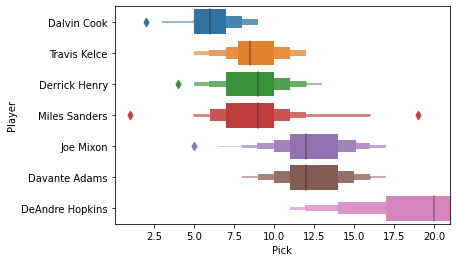

In [103]:
boxenplot = sns.boxenplot(x="Pick", y="Player", data=player_comparison_df, orient='h')

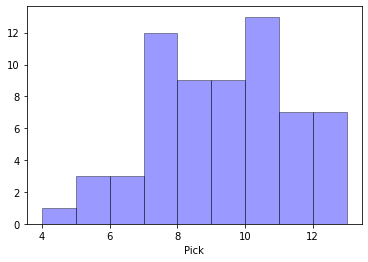

In [107]:
player_data = player_comparison_df.loc[player_comparison_df['Player'] == "Derrick Henry"]
distplot = sns.distplot(player_data["Pick"], color='blue', bins=9, kde=False, hist_kws=dict(edgecolor="k", linewidth=1));